In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [108]:
from astropy.utils.data import download_file

image_file = "Ran_Shikha_Joshi/Bias_Read_Noise/CCD Image 3.fit"

In [110]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: Ran_Shikha_Joshi/Bias_Read_Noise/CCD Image 3.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      32   (658, 492)   int16 (rescales to uint16)   


In [112]:
image_data = hdu_list[0].data

In [114]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(492, 658)


In [116]:
hdu_list.close()

In [118]:
image_data = fits.getdata(image_file)

In [120]:
print(type(image_data))  # Show the Python type for image_data
print(image_data.shape)  # Show the number of pixels per side in the 2-D image

<class 'numpy.ndarray'>
(492, 658)


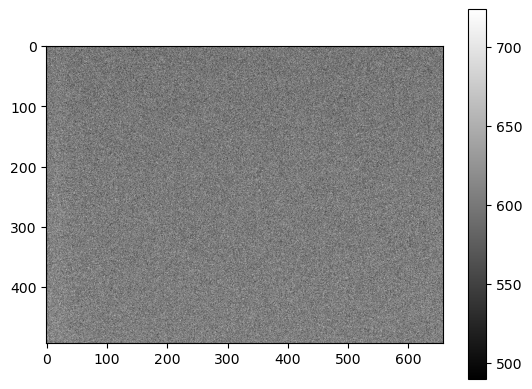

In [122]:
plt.imshow(image_data, cmap="gray")
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [64]:
print("Min:", np.min(image_data))
print("Max:", np.max(image_data))
print("Mean:", np.mean(image_data))
print("Stdev:", np.std(image_data))

Min: 480
Max: 34084
Mean: 612.2196264857786
Stdev: 126.16108969477438


In [66]:
print(type(image_data.flatten()))
print(image_data.flatten().shape)

<class 'numpy.ndarray'>
(323736,)


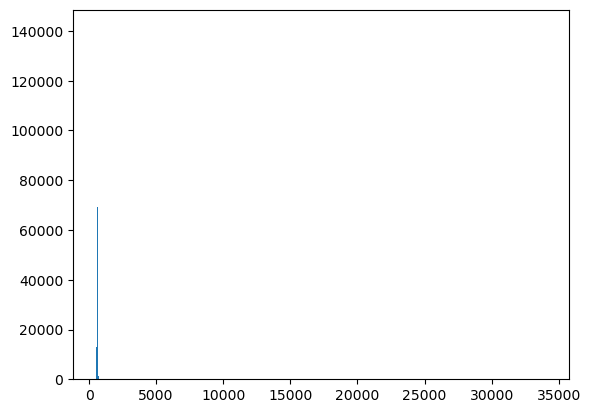

In [68]:
histogram = plt.hist(image_data.flatten(), bins="auto")

In [70]:
from matplotlib.colors import LogNorm

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

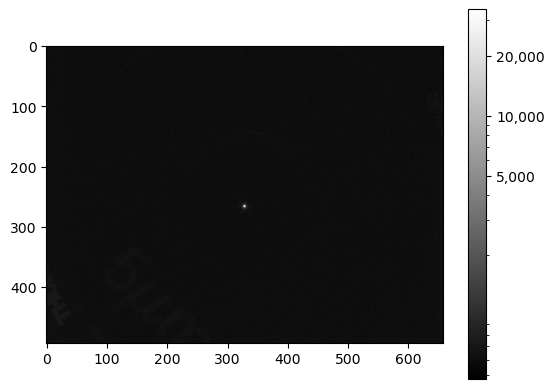

In [72]:
plt.imshow(image_data, cmap="gray", norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.0e3, 1.0e4, 2.0e4])
cbar.ax.set_yticklabels(["5,000", "10,000", "20,000"])

In [94]:
image_list = ["Ran_Shikha_Joshi/Linearity_Saturation/CCD Image "+ str(n) + ".fit" for n in range(30, 36)]
image_concat = [fits.getdata(image) for image in image_list]

In [96]:
# The long way
final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image

# The short way
# final_image = np.sum(image_concat, axis=0)

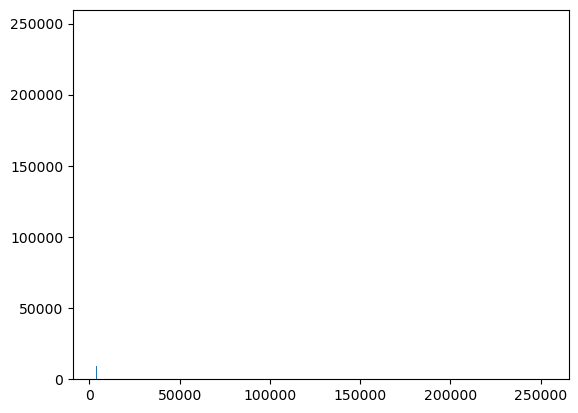

In [98]:
image_hist = plt.hist(final_image.flatten(), bins="auto")

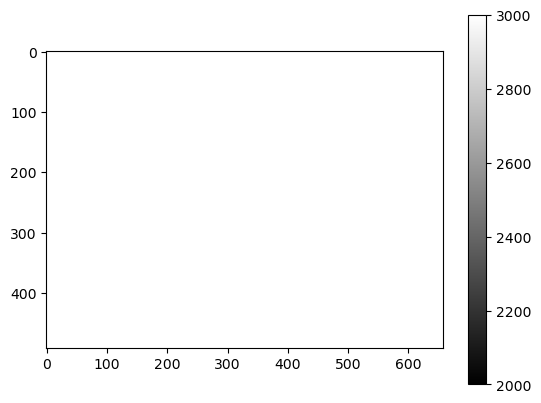

In [102]:
plt.imshow(final_image, cmap="gray", vmin=2e3, vmax=3e3)
plt.colorbar()